### Лабораторная работа 2. Классификация

#### Задачи:
1. 

In [588]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


#### Описание датасета:
Для анализа используется датасет "Ceasarian Section Dataset for Classification", содержащий данные о проведении Кесарева Сечения в зависимости от различных параметров проведения родов.

- **Age:** Возраст роженицы
- **Delivery No:** Какие роды у роженицы по счёту
- **Delivery Time:** Время родов (преждевременные, вовремя, задержавшиеся)
- **Blood of Pressure:** Артериальное давление
- **Heart Problem:** Сердечные заболевания
- **Caesarian:** Сделали ли Кесарево


In [589]:
df = pd.read_csv('Ceasarian Section Dataset for Classification.csv')
df.head()

,Age,Delivery No,Delivery Time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,Timely,High,apt,No
1,26,2,Timely,Normal,apt,Yes
2,26,2,Premature,Normal,apt,No
3,28,1,Timely,High,apt,No
4,22,2,Timely,Normal,apt,Yes


#### Общие статистические данные

Размер датасета

In [590]:
df.shape

(80, 6)

Информация о столбцах и типах данных в них

In [591]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Age                80 non-null     int64 
 1   Delivery No        80 non-null     int64 
 2   Delivery Time      80 non-null     object
 3   Blood of Pressure  80 non-null     object
 4   Heart Problem      80 non-null     object
 5   Caesarian          80 non-null     object
dtypes: int64(2), object(4)
memory usage: 3.9+ KB


In [592]:
df.describe()

,Age,Delivery No
count,80.000000,80.000000
mean,27.687500,1.662500
std,5.017927,0.794662
min,17.000000,1.000000
25%,25.000000,1.000000
50%,27.000000,1.000000
75%,32.000000,2.000000
max,40.000000,4.000000


In [593]:
df.describe(include='object')

,Delivery Time,Blood of Pressure,Heart Problem,Caesarian
count,80,80,80,80
unique,3,4,2,3
top,Timely,Normal,apt,Yes
freq,46,40,50,42


Пропусков не обнаружено. Проверим категориальные данные

In [594]:
df['Caesarian'].unique()


array(['No', 'Yes', 'yes'], dtype=object)

In [595]:
df['Blood of Pressure'].unique()


array(['High', 'Normal', 'Low', 'low'], dtype=object)

In [596]:
df['Delivery No'].unique()


array([1, 2, 3, 4])

In [597]:
df['Heart Problem'].unique()


array(['apt', 'inept'], dtype=object)

Обнаружены ошибки! Устраняем

In [598]:
df['Caesarian'] = ['Yes' if x=='yes' else x for x in df['Caesarian']]
df['Blood of Pressure'] = ['Low' if x=='low' else x for x in df['Blood of Pressure'] ]



Теперь проверим набор данных на сбалансированность

In [599]:
df['Caesarian'].value_counts()

Caesarian
Yes    46
No     34
Name: count, dtype: int64

Набор достаточно сбалансирован

Переведём категориальные признаки

In [600]:
#from sklearn.preprocessing import OneHotEncoder
#enc = OneHotEncoder()
#res = enc.fit_transform(df[['Delivery Time']])
#df[enc.categories_[0]] = res.toarray()
#res = enc.fit_transform(df[['Blood of Pressure']])
#df[enc.categories_[0]] = res.toarray()
#res = enc.fit_transform(df[['Heart Problem']])
#df[enc.categories_[0]] = res.toarray()
#df.drop(columns=['Delivery Time', 'Blood of Pressure', 'Heart Problem'], inplace=True)


from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
df[['Delivery Time', 'Blood of Pressure', 'Heart Problem']] = enc.fit_transform(df[['Delivery Time', 'Blood of Pressure', 'Heart Problem']])
df.head()



,Age,Delivery No,Delivery Time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,2.0,0.0,0.0,No
1,26,2,2.0,2.0,0.0,Yes
2,26,2,1.0,2.0,0.0,No
3,28,1,2.0,0.0,0.0,No
4,22,2,2.0,2.0,0.0,Yes


#### Визуализация данных

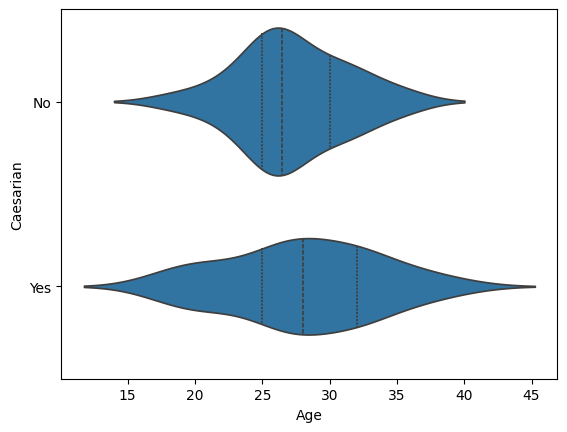

<Axes: xlabel='Delivery No', ylabel='Caesarian'>

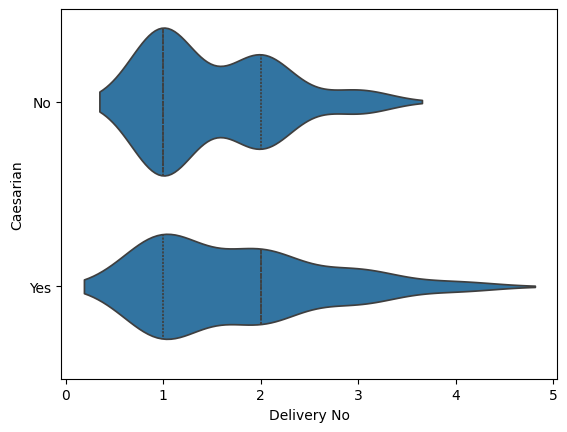

In [601]:
sns.violinplot(y='Caesarian', x='Age', data=df, inner='quartile')
plt.show()
sns.violinplot(y='Caesarian', x='Delivery No', data=df, inner='quartile')


In [602]:
#sns.pairplot(df, hue='Caesarian', markers='+')
#plt.show()

Видим, что отличия незначительны, но присутствуют

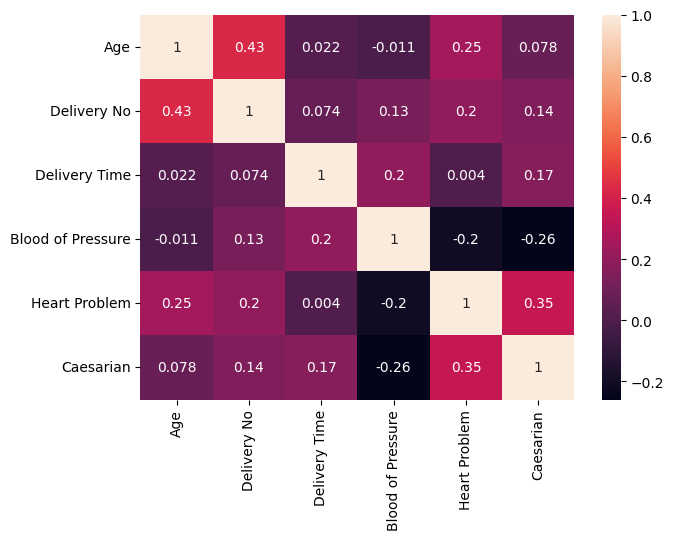

In [603]:
df['Caesarian'] = df['Caesarian'].map({'Yes': 1, 'No': 0})
plt.figure(figsize=(7,5))
sns.heatmap(df.corr(numeric_only = True), annot=True)
plt.show()

#### Построение модели

Разделение набора данных

In [604]:
X = df.drop(['Caesarian'], axis=1)
y = df['Caesarian']
print(f'X shape: {X.shape} | y shape: {y.shape} ')

X shape: (80, 5) | y shape: (80,) 


In [605]:
import scipy.stats as stats
from sklearn.model_selection import train_test_split
#y_mapped = y.map({'No': 0, 'Yes': 1})
y_mapped = y
X_train, X_test, y_train, y_test = train_test_split(X, y_mapped, test_size=0.20, random_state=15, stratify=y_mapped)
stats.ttest_ind (a=y_train, b=y_test)

TtestResult(statistic=np.float64(0.11166926157549062), pvalue=np.float64(0.9113725191161046), df=np.float64(78.0))

#### Выбор оптимальной модели

Попробуем следующие алгоритмы:

Logistic Regression (LR) </br>
Linear Discriminant Analysis (LDA)</br>
K-Nearest Neighbors (KNN)</br>
Classification and Regression Trees (CART)</br>
Gaussian Naive Bayes (NB)</br>
Support Vector Machines (SVM)</br>

In [606]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

models = []
models.append(('LR', LogisticRegression(solver='lbfgs', max_iter=1000)))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVC', SVC(gamma='auto')))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

# оцениваем их метрики
results = []
model_names = []
for name, model in models:
  kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
  cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
  results.append(cv_results)
  model_names.append(name)
  print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 0.740476 (0.156293)
LDA: 0.771429 (0.149905)
KNN: 0.711905 (0.220145)
CART: 0.628571 (0.176319)
NB: 0.740476 (0.209050)
SVC: 0.666667 (0.168359)


LinearDiscriminantAnalysis показал лучшие метрики среди всех алгоритмов.


#### Обучение модели

In [607]:
from sklearn.metrics import accuracy_score

sk_lda = LinearDiscriminantAnalysis(solver='eigen')
sk_lda.fit(X_train, y_train)
sk_lda_pred_res = sk_lda.predict(X_test)
sk_transformed = sk_lda.transform(X_train)
sk_lda_accuracy = accuracy_score(y_test, sk_lda_pred_res)

print(f'sk LDA accuracy: {sk_lda_accuracy}')
print(f'sk LDA prediction: {sk_lda_pred_res}')
print('sk transformed features', sk_transformed[:5].T, sep='\n')

sk LDA accuracy: 0.375
sk LDA prediction: [1 0 1 1 1 1 0 0 0 1 1 1 0 1 1 1]
sk transformed features
[[-1.26796537  2.24672119  0.5356767   0.44172121 -0.48926683]]


## Визуализация решения

<Axes: title={'center': 'LDA surface with original features'}>

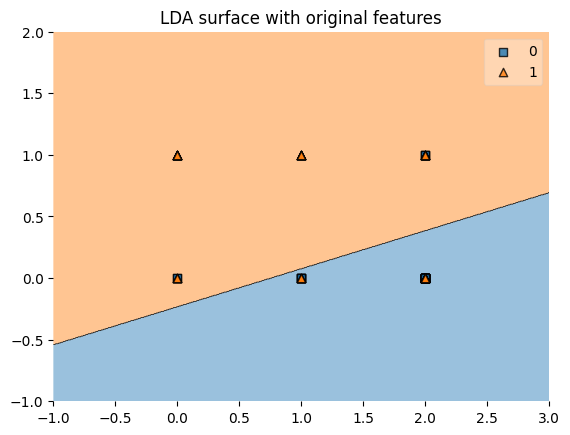

In [608]:
from mlxtend.plotting import plot_decision_regions
y_s = y_train
X_2d= X_train[['Blood of Pressure', 'Heart Problem']].values

y_2d = y_s.values


sk_lda1 = LinearDiscriminantAnalysis(solver='eigen')
sk_lda1.fit(X_2d, y_2d)

plt.title('LDA surface with original features')
plot_decision_regions(
    	X=X_2d,
    	y=y_2d,
    	clf=sk_lda1)

<Axes: title={'center': 'LDA surface with transformed features'}>

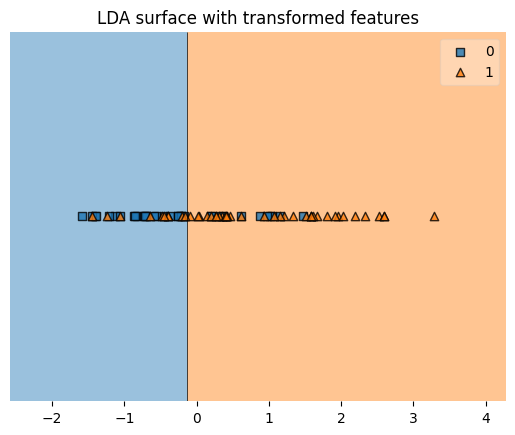

In [609]:

dff = df['Caesarian']

Xs = df[['Blood of Pressure', 'Heart Problem']]
ys = dff.values

sk_lda2 = LinearDiscriminantAnalysis(solver='eigen')
X1_lda = sk_lda2.fit(X, ys).transform(X)

Xs = X1_lda

X1_lda_train, X1_lda_test, y1_train, y1_test = train_test_split(X1_lda, ys, random_state=0)

sk_lda2.fit(X1_lda_train, y1_train)

plt.title('LDA surface with transformed features')
plot_decision_regions(X=X1_lda, y=ys, clf=sk_lda2)

In [610]:
predicted = sk_lda2.predict(X1_lda_test)


In [611]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y1_test, predicted)#Оценим точность классификации.

## Precision e Recall
recall = metrics.recall_score(y1_test, predicted, average="weighted")
precision = metrics.precision_score(y1_test, predicted, average="weighted")
print("Recall (all 1s predicted right):", round(recall,2))
print("Precision (confidence when predicting a 1):", round(precision,2))
print("Detail:")
print(metrics.classification_report(y1_test, predicted, target_names=[str(i) for i in np.unique(y_test)]))

Recall (all 1s predicted right): 0.7
Precision (confidence when predicting a 1): 0.74
Detail:
              precision    recall  f1-score   support

           0       0.83      0.50      0.62        10
           1       0.64      0.90      0.75        10

    accuracy                           0.70        20
   macro avg       0.74      0.70      0.69        20
weighted avg       0.74      0.70      0.69        20

